# Multilinear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Data Cleansing

In [3]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


# Data Exploration

In [5]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


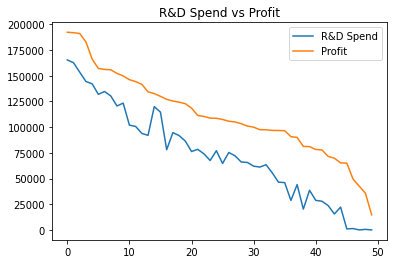

In [6]:
df['R&D Spend'].plot()
df['Profit'].plot()
plt.title('R&D Spend vs Profit')
plt.legend()

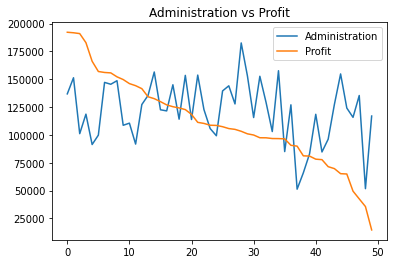

In [7]:
df['Administration'].plot()
df['Profit'].plot()
plt.title('Administration vs Profit')
plt.legend()

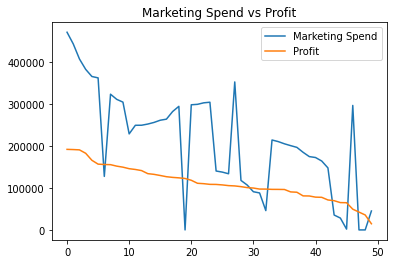

In [8]:
df['Marketing Spend'].plot()
df['Profit'].plot()
plt.title('Marketing Spend vs Profit')
plt.legend()

<AxesSubplot:>

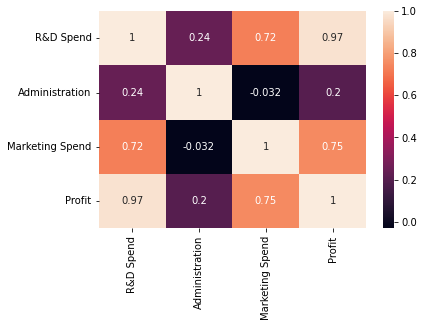

In [9]:
sns.heatmap(df.corr(),annot=True)

# Feature Engineering

In [10]:
State = pd.get_dummies(df['State'], prefix='State',drop_first=False)
df.drop(['State'],axis=1,inplace=True)
df = pd.concat([df,State], axis=1)

In [11]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [12]:
scaler = MinMaxScaler()
df['R&D Spend'] = scaler.fit_transform(df[['R&D Spend']])
df['Administration'] = scaler.fit_transform(df[['Administration']])
df['Marketing Spend'] = scaler.fit_transform(df[['Marketing Spend']])
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,1.000000,0.651744,1.000000,192261.83,0,0,1
1,0.983359,0.761972,0.940893,191792.06,1,0,0
2,0.927985,0.379579,0.864664,191050.39,0,1,0
3,0.873136,0.512998,0.812235,182901.99,0,0,1
4,0.859438,0.305328,0.776136,166187.94,0,1,0


# Preprocessing 

In [13]:
df.drop('Marketing Spend',axis=1,inplace=True) #Remove Multicolinear

In [14]:
X = df.drop(['Profit'], axis=1)
y = df['Profit']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=0)

# Modelling

In [34]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
#get importance
importance = model.coef_

In [36]:
for i,v in enumerate(importance):
    print('Feature : %0d, score: %5f '%(i,v))

Feature : 0, score: 140813.624037 
Feature : 1, score: -222.895459 
Feature : 2, score: -219.309465 
Feature : 3, score: 265.423501 
Feature : 4, score: -46.114036 


In [37]:
df.drop('State_California', axis=1, inplace = True)
df.drop('State_Florida', axis=1, inplace = True)
df.drop('State_New York', axis=1, inplace = True)
df.drop('Administration', axis=1, inplace = True)

In [38]:
X = df.drop(['Profit'], axis=1)
y = df['Profit']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=0)

In [41]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [42]:
y_pred =  model.predict(X_test)

In [43]:
result = pd.DataFrame({'Actual': y_test, 'Predict': y_pred})
result

,Actual,Predict
28,103282.38,104667.278060
11,144259.40,134150.834106
10,146121.95,135207.800195
41,77798.83,72170.544289
2,191050.39,179090.586025
27,105008.31,109824.773866
38,81229.06,65644.277738
31,97483.56,100481.432771
22,110352.25,111431.752024
4,166187.94,169438.148435


# Evaluate Model

<AxesSubplot:>

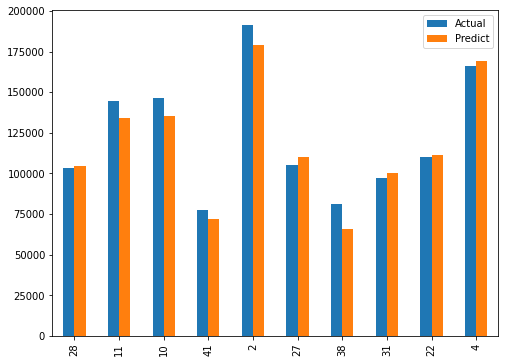

In [44]:
result.plot(kind='bar',figsize=(8,6))

In [45]:
mean_absolute_error(y_test, y_pred)

6772.453280477898

In [46]:
mean_absolute_percentage_error(y_test, y_pred)

0.059093937247100305